In [120]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [121]:
df= pd.read_csv('CustomerSegmentation_Train.csv')

In [122]:
#df=df[:300]

In [123]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# loop through each column in your dataset
for col in df.columns:
    # check if the column is categorical
    if df[col].dtype == 'object':
        # use LabelEncoder to convert the categorical values to numeric
        df[col] = le.fit_transform(df[col])

In [124]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,0,3
8064,464685,1,0,35,0,4,3.0,2,4.0,3,3
8065,465406,0,0,33,1,5,1.0,2,1.0,5,3
8066,467299,0,0,27,1,5,1.0,2,4.0,5,1


In [125]:
'''target_variable = None
for column in df.columns[::-1]:
    if df[column].dtype == 'object':
        if len(df[column].unique()) <= 4:
            target_variable = column
            break'''
target_variable = {df.columns[-1]: 'target_variable'}
df = df.rename(columns=target_variable)
target_variable="target_variable"

'''if target_variable is None:
    corr = df.corr()
    print(corr)
    target_variable = corr.nlargest(1, 'target_variable')['target_variable'].index[0]'''

df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,target_variable
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,0,3
8064,464685,1,0,35,0,4,3.0,2,4.0,3,3
8065,465406,0,0,33,1,5,1.0,2,1.0,5,3
8066,467299,0,0,27,1,5,1.0,2,4.0,5,1


In [126]:
df = df.dropna()


[0.22071896 0.02346008 0.03789982 0.22806175 0.04231656 0.12067999
 0.11196788 0.05439247 0.09010848 0.07039402]


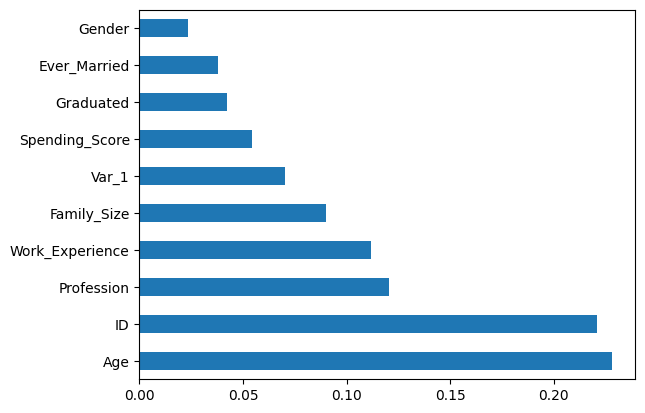

In [127]:
y = df[target_variable]
X = df.drop(target_variable, axis=1)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances_sorted = feat_importances.sort_values(ascending=False)

feat_importances_sorted.plot(kind='barh')
plt.show()
# Select the top 4 most important features
top_4_features = feat_importances_sorted[:4].index.tolist()

# Create a new DataFrame with only the top 4 features and the target variable
df= df[top_4_features + [target_variable]]

In [128]:
print(df.head())

   Age      ID  Profession  Work_Experience  target_variable
0   22  462809           5              1.0                3
2   67  466315           2              1.0                1
3   67  461735           7              0.0                1
5   56  461319           0              0.0                2
6   32  460156           5              1.0                2


In [129]:
null_values = df.isnull().sum()

# Print the number of null values in each column
print(null_values)

# Replace null values with column mean values
mean_values = df.mean()
df.fillna(mean_values, inplace=True)

Age                0
ID                 0
Profession         0
Work_Experience    0
target_variable    0
dtype: int64


In [130]:
def handle_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Apply the handle_outliers_IQR function to each numeric column in the dataframe
for col in df.select_dtypes(include='number'):
    df = handle_outliers_IQR(df, col)

In [131]:
print(df.columns)

Index(['Age', 'ID', 'Profession', 'Work_Experience', 'target_variable'], dtype='object')


In [132]:
from sklearn.compose import ColumnTransformer
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col!=target_variable]
print(cat_cols)


df = pd.get_dummies(df, columns = cat_cols)
print(df)

# Print transformed data
print(df.head())

[]
       Age      ID  Profession  Work_Experience  target_variable
0     22.0  462809           5              1.0                3
2     67.0  466315           2              1.0                1
3     67.0  461735           7              0.0                1
5     56.0  461319           0              0.0                2
6     32.0  460156           5              1.0                2
...    ...     ...         ...              ...              ...
8063  22.0  464018           9              0.0                3
8064  35.0  464685           4              3.0                3
8065  33.0  465406           5              1.0                3
8066  27.0  467299           5              1.0                1
8067  37.0  461879           4              0.0                1

[6969 rows x 5 columns]
    Age      ID  Profession  Work_Experience  target_variable
0  22.0  462809           5              1.0                3
2  67.0  466315           2              1.0                1
3  67.

In [133]:
# Standardize numerical variables using z-score normalization
num_cols = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [134]:
pred = df[target_variable]
x_content = df.drop(target_variable, axis=1)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [136]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(pred)

In [137]:
print(y_transformed)

[3 1 1 ... 3 1 1]


In [138]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_content,y_transformed, test_size=0.3,random_state =2)

In [139]:
acc=[]
models=["Random Forest","KNeighbors","Support Vector Machine","Logistic Regression"]

In [140]:


# Fit random forest model


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
acc.append(rf_accuracy)

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
acc.append(knn_accuracy)

# Fit SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
acc.append(svm_accuracy)

# Fit logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
acc.append(lr_accuracy)

# Print accuracies
print('Logistic Regression accuracy:', lr_accuracy)
print('Random Forest accuracy:', rf_accuracy)
print('KNN accuracy:', knn_accuracy)
print('SVM accuracy:', svm_accuracy)

Logistic Regression accuracy: 0.44428503108560496
Random Forest accuracy: 0.4337637494021999
KNN accuracy: 0.4294595887135342
SVM accuracy: 0.45528455284552843


In [141]:
metrics={
    'rf_accuracy':rf_accuracy,
     'knn_accuracy':knn_accuracy,
     'svm_accuracy':svm_accuracy,
     'lr_accuracy':lr_accuracy,
     }

In [142]:
import json
json.dump(
obj=metrics,
fp=open('metrics.json', 'w'),
indent=4,
sort_keys=True
)

In [143]:
x_pos = np.arange(len(acc))

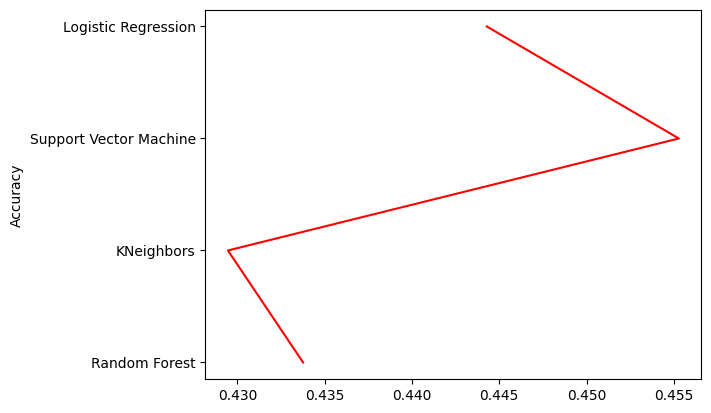

In [144]:
plt.plot(acc, models, color ="red")

plt.ylabel('Accuracy')
plt.show()


In [148]:
plt.savefig('plot.png')


<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Find the best model
models = {'Logistic Regression': lr_accuracy, 'Random Forest': rf_accuracy, 'KNN': knn_accuracy, 'SVM': svm_accuracy}
best_model = max(models, key=models.get)

# Print the best model and its accuracy
print('Best model:', best_model)
print('Accuracy:', models[best_model])

# Print classification report and confusion matrix for the best model
if best_model == 'Logistic Regression':
    pred = lr_pred
elif best_model == 'Random Forest':
    pred = rf_pred
elif best_model == 'KNN':
    pred = knn_pred
else:
    pred = svm_pred
    
print('Classification Report:\n', classification_report(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

Best model: SVM
Accuracy: 0.45528455284552843
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38       521
           1       0.32      0.30      0.31       464
           2       0.48      0.47      0.47       567
           3       0.60      0.65      0.62       539

    accuracy                           0.46      2091
   macro avg       0.44      0.45      0.45      2091
weighted avg       0.45      0.46      0.45      2091

Confusion Matrix:
 [[197 111 121  92]
 [110 139 151  64]
 [ 90 133 266  78]
 [117  52  20 350]]
